In [1]:
# import tensorflow as tf
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from keras.models import load_model
import multiprocessing
# from skimage.transform import resize

In [2]:
class image_similarity(multiprocessing.Process):
    def __init__(self):
        self.vgg_model = vgg16.VGG16(weights='imagenet')
        self.feat_extractor = Model(inputs=self.vgg_model.input, outputs=self.vgg_model.get_layer("fc2").output)
    def image_path(self,data_path):
        self.imgs_path = data_path
        self.imgs_model_width = 224
        self.imgs_model_height = 224
        self.nb_closest_images = 3 # number of most similar images to retrieve
        self.files = [self.imgs_path + x for x in os.listdir(self.imgs_path) if "jpg" or "jpeg" in x]
        print("number of images:",len(self.files))
        # load all the images and prepare them for feeding into the CNN

        importedImages = []

        for f in self.files:
            filename = f
            original = load_img(filename, target_size=(224, 224))
            numpy_image = img_to_array(original)
            image_batch = np.expand_dims(numpy_image, axis=0)

            importedImages.append(image_batch)

        images = np.vstack(importedImages)

        processed_imgs = preprocess_input(images.copy())
        # extract the images features
        imgs_features = self.feat_extractor.predict(processed_imgs)
        print("features successfully extracted!")
        imgs_features.shape
        # compute cosine similarities between images
        cosSimilarities = cosine_similarity(imgs_features)
        # store the results into a pandas dataframe
        self.cos_similarities_df = pd.DataFrame(cosSimilarities, columns=self.files, index=self.files)
        #cos_similarities_df.head()
    # function to retrieve the most similar products for a given one
    def retrieve_most_similar_products(self,given_img):

        print("-----------------------------------------------------------------------")
        print("original product:",str(given_img)[:])

        original = load_img(given_img, target_size=(self.imgs_model_width, self.imgs_model_height))
        plt.imshow(original)
        plt.show()

        print("-----------------------------------------------------------------------")
        print("most similar products:")

        closest_imgs = self.cos_similarities_df[given_img].sort_values(ascending=False)[1:self.nb_closest_images+1].index
        closest_imgs_scores = self.cos_similarities_df[given_img].sort_values(ascending=False)[1:self.nb_closest_images+1]

        for i in range(0,len(closest_imgs)):
            if closest_imgs_scores[i]*100 >=70:

                original = load_img(closest_imgs[i], target_size=(self.imgs_model_width, self.imgs_model_height))
                plt.imshow(original)
                plt.show()
                print("similarity score : ",closest_imgs_scores[i]*100,"%", " Name:",str(closest_imgs[i])[:].replace(".jpeg",""))
            else:
                print("There is no other similler Image.....")
                break

In [3]:
image=image_similarity()

In [4]:
# "/home/dev/Downloads/PPO_Test1/"
image.image_path("flowers/")

number of images: 603
features successfully extracted!


-----------------------------------------------------------------------
original product: flowers/17_033.png


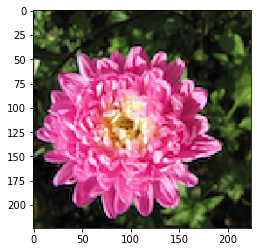

-----------------------------------------------------------------------
most similar products:


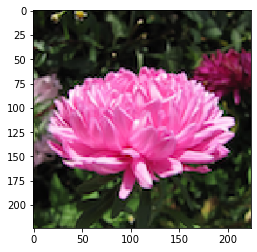

similarity score :  84.43358540534973 %  Name: flowers/17_040.png


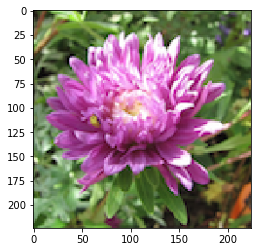

similarity score :  83.17544460296631 %  Name: flowers/17_034.png


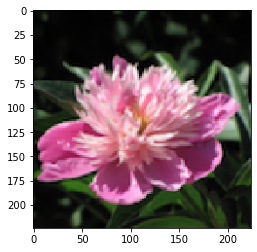

similarity score :  83.04392695426941 %  Name: flowers/08_019.png


In [12]:
# parameters setup
imgs_path = "flowers/"
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" or "jpeg" or "png" in x]

image.retrieve_most_similar_products(files[550])